[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/dustpy/HEAD?labpath=examples%2Fexample_ice_lines.ipynb)

# Example: Ice Lines

In the example we want to implement several ice lines into a `DustPy` simulation.  
Ice lines are locations in protoplanetary disks where the temperature drop below a value where a chemical species can freeze out.

It has long been speculated that different chemical compositions of dust particles can influence their collisional behavior depending on the different surface forces these species have. This can to first order be implemented by changing the fragmentation velocity depending on the temperature in the disk.

The example here will be similar to [Pinilla et al. (2017)](https://doi.org/10.3847/1538-4357/aa7edb):

Above $150\,\mathrm{K}$ all volatiles are evaporated and only the bare silicate grains are left. He we use a fragmentation velocity of $1\,\mathrm{m/s}$. Below $150\,\mathrm{K}$ water freezes out onto the grain. Due to the dipolar nature of the water molecule these grains are more sticky and we use a fragmentation velocity of $10\,\mathrm{m/s}$. At about $80\,\mathrm{K}$ ammonia $\left(\mathrm{NH}_3\right)$ freezes out which has slightly weaker dipolar forces than water and we therefore use a fragmentation velocity of $7\,\mathrm{m/s}$. At $44\,\mathrm{K}$ carbon dioxide $\left(\mathrm{CO}_2\right)$ freezes out and we expect the fragmentation velocity to go back to $1\,\mathrm{m/s}$.

However, note that [Musiolik & Wurm (2019)](https://doi.org/10.3847/1538-4357/ab0428) that these differences might not exist at all. We'll use them here anyway for demonstration purposes.

The method described here can also be used to implement sintering effects as described by [Okuzumi et al. (2016)](https://doi.org/10.3847/0004-637X/821/2/82).

In [1]:
from dustpy import Simulation
import dustpy.constants as c

In [2]:
sim = Simulation()

In [3]:
sim.initialize()

At this point the fragmentation velocity is constant with the default value of $1\,\mathrm{m/s}$.

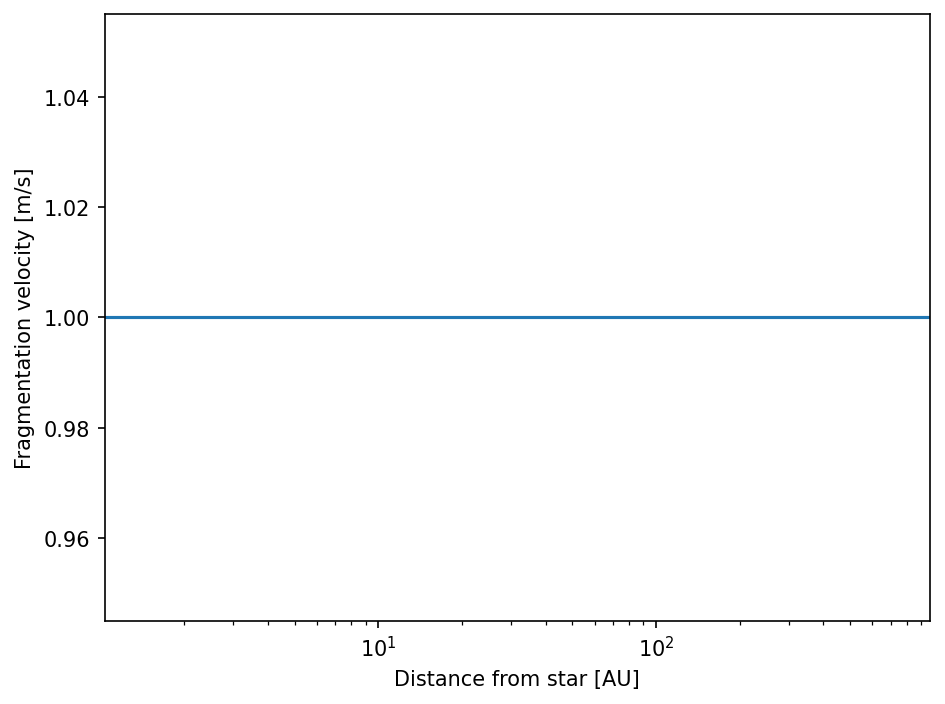

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.semilogx(sim.grid.r/c.au, sim.dust.v.frag/100.)
ax.set_xlim(sim.grid.r[0]/c.au, sim.grid.r[-1]/c.au)
ax.set_xlabel("Distance from star [AU]")
ax.set_ylabel("Fragmentation velocity [m/s]")
fig.tight_layout()
plt.show()

We now have to write a function that constructs the fragmentation velocity according the prescription above.

In [5]:
import numpy as np

def vfrag(sim):
    vfrag = np.where(sim.gas.T<150., 1000., 100.)
    vfrag = np.where(sim.gas.T<80., 700., vfrag)
    vfrag = np.where(sim.gas.T<44., 100., vfrag)
    return vfrag

We can assign the return value of this function to the fragmentation velocity.

In [6]:
sim.dust.v.frag = vfrag(sim)

We also update the whole simulation frame to update the fields that depend on the fragmentation velocity.

In [7]:
sim.update()

The fragmentation velocity now changes at the introduced ice lines.

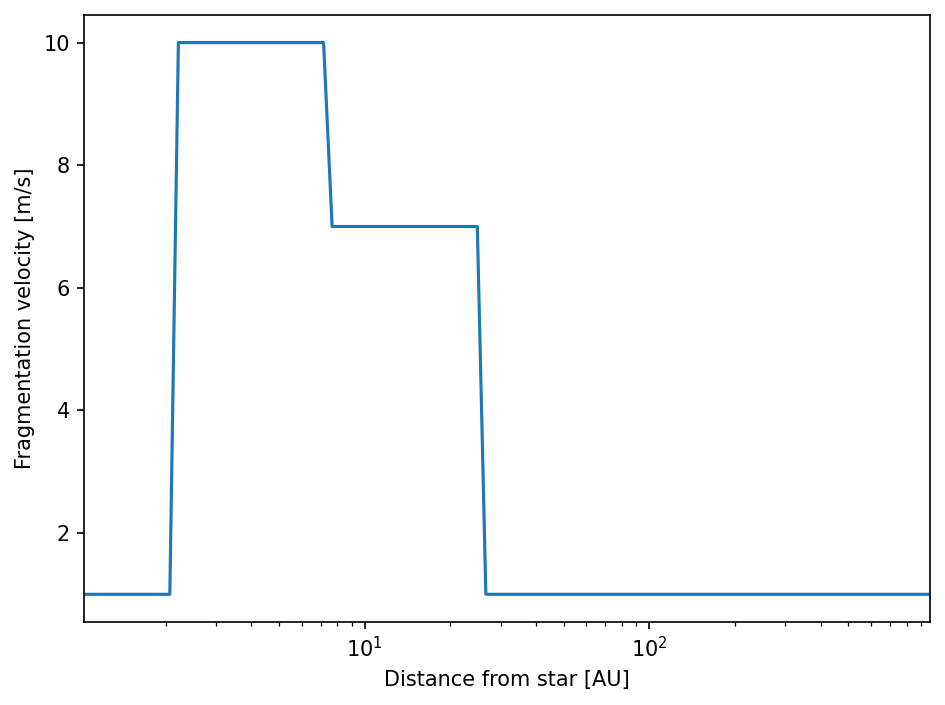

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.semilogx(sim.grid.r/c.au, sim.dust.v.frag/100.)
ax.set_xlim(sim.grid.r[0]/c.au, sim.grid.r[-1]/c.au)
ax.set_xlabel("Distance from star [AU]")
ax.set_ylabel("Fragmentation velocity [m/s]")
fig.tight_layout()
plt.show()

Note that we do not assign out function to the updater of the fragmentation velocities. Since the temperature profile is constant in the default model, the fragmentation velocity would not change. It's therefore not required to update it at every time step.

We are now ready to start the simulation.

In [9]:
sim.writer.datadir = "example_ice_lines"

In [10]:
sim.run()


DustPy v1.0.5

Documentation: https://stammler.github.io/dustpy/
PyPI:          https://pypi.org/project/dustpy/
GitHub:        https://github.com/stammler/dustpy/

Please cite Stammler & Birnstiel (2022).

Checking for mass conservation...

    - Sticking:
        max. rel. error:  2.75e-14
        for particle collision
            m[114] =  1.93e+04 g    with
            m[116] =  3.73e+04 g
    - Full fragmentation:
        max. rel. error:  5.55e-16
        for particle collision
            m[55] =  7.20e-05 g    with
            m[55] =  7.20e-05 g
    - Erosion:
        max. rel. error:  1.78e-15
        for particle collision
            m[110] =  5.18e+03 g    with
            m[118] =  7.20e+04 g

Creating data directory 'example_ice_lines'.
Writing file example_ice_lines/data0000.hdf5
Writing dump file example_ice_lines/frame.dmp
Writing file example_ice_lines/data0001.hdf5
Writing dump file example_ice_lines/frame.dmp
Writing file example_ice_lines/data0002.hdf5
Writing d

Here is the result of our simulation.

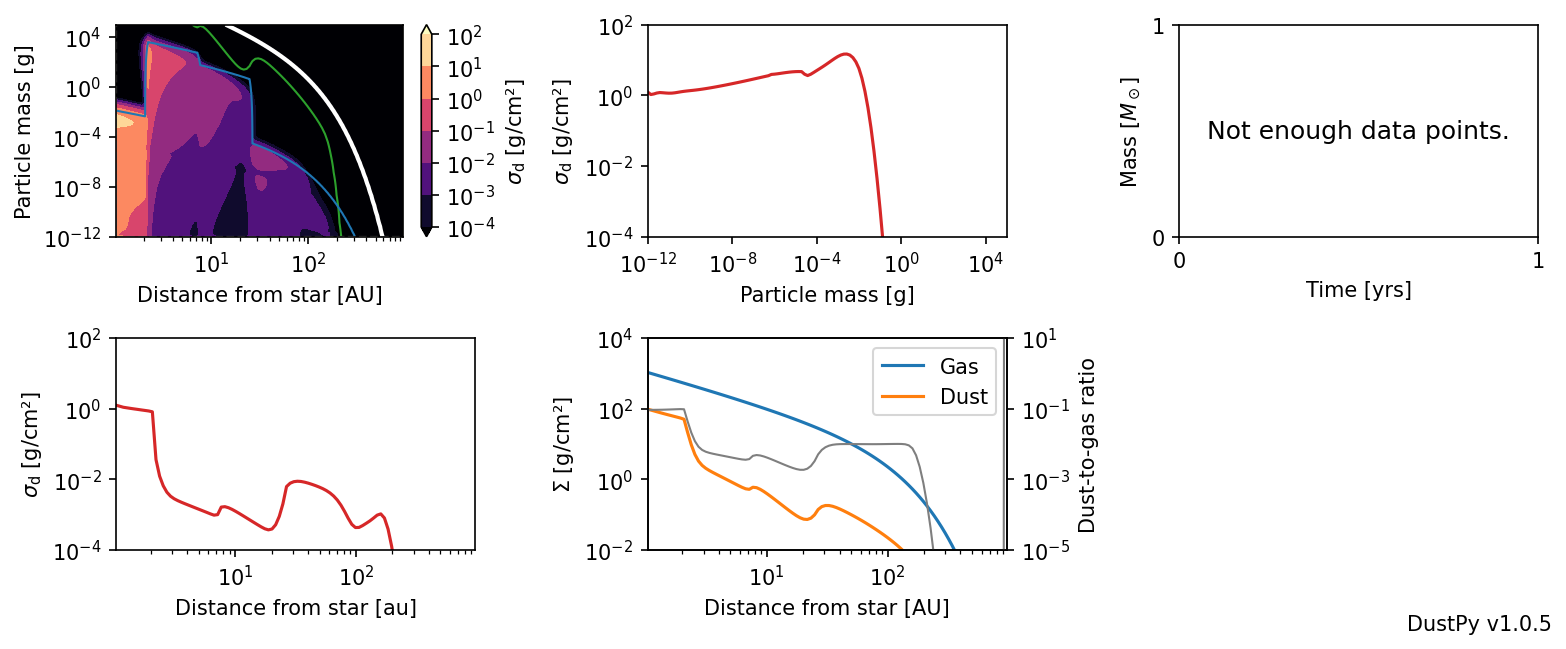

In [11]:
from dustpy import plot

plot.panel(sim)

Note that the inner disk is enriched in dust. The reason for this is the so-called "traffic jam" effect. Dust particles outside the water ice line grow to larger sizes, which drift rapidly. After crossing the water ice line the fragment down so slowly drifting particles. Therefore, dust accumulates inside the water ice line.